In [4]:
import pandas as pd
from scipy.stats import pearsonr
import os
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
folder = '/Users/yiwengeng/Documents/PregnantPrj/Data/PTL_Data/'
dirlist = ["PTL01","PTL02","PTL03","PTL05","PTL06","PTL07","PTL09","PTL10","PTL11","PTL12","PTL13","PTL14","PTL15","PTL16","PTL17","PTL18"]
# dirlist = ["PTL02","PTL03"]
act_names=["activity_score", "score_meet_daily_targets","score_move_every_hour","score_stay_active","steps"]
hr_names=["bpm"]
spo2_names=["spo2"]
hrhrv_names=["5min_hr","5min_hrv"]
ready_names=["readiness_score", "score_previous_night","score_sleep_balance", 
             "score_previous_day","score_activity_balance","score_resting_hr",
             "score_hrv_balance","score_recovery_index","score_temperature"]
sleep_names=["sleep_score", "duration","efficiency","onset_latency","rmssd",
             "score_deep","score_efficiency","score_rem"]

df_act = {}
df_sleep = {}
df_ready = {}
df_hr = {}
df_hrhrv = {}
df_spo2 = {}

for dir in dirlist:
    ID = int(dir[-2:])
    os.chdir(folder+dir)
    files = sorted(os.listdir())
    print("ID",ID)
    # activity
    df_act[ID] = pd.read_csv(files[0], parse_dates = [0])
    df_act[ID].rename(columns={'score':'activity_score'},inplace=True)
    df_act[ID]['ID'] =  ID
    df_act[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None
    print(len(df_act[ID]))

    # sleep
    df_sleep[ID] = pd.read_csv(files[7], parse_dates = [0])
    df_sleep[ID].rename(columns={'score':'sleep_score'},inplace=True)
    df_sleep[ID]['ID'] =  ID
    df_sleep[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None
    print(len(df_sleep[ID]))
    # readiness
    df_ready[ID] = pd.read_csv(files[5], parse_dates = [0])
    df_ready[ID].rename(columns={'score':'readiness_score'},inplace=True)
    df_ready[ID]['ID'] =  ID
    df_ready[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None
    print(len(df_ready[ID]))
    # daily_hr
    df_hr[ID] = pd.read_csv(files[1], parse_dates = [0])
    df_hr[ID]['ID'] =  ID
    df_hr[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None    
    print(len(df_hr[ID]))
    # hr_hrv
    df_hrhrv[ID] = pd.read_csv(files[3], parse_dates = [0])
    df_hrhrv[ID].rename(columns={'5-min hr':'5min_hr','5-min hrv':'5min_hrv'},inplace=True)
    df_hrhrv[ID]['ID'] =  ID
    df_hrhrv[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None   
    df_hrhrv[ID] = df_hrhrv[ID].loc[df_hrhrv[ID]['5min_hr'] != 0]
    print(len(df_hrhrv[ID]))
    # spo2
    df_spo2[ID] = pd.read_csv(files[2], parse_dates = [0])
    df_spo2[ID].rename(columns={'average spo2':'spo2'},inplace=True)
    df_spo2[ID]['ID'] =  ID
    df_spo2[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None    
    print(len(df_spo2[ID]))
    print("*"*20)

ID 1
16
11
11
1640
1169
11
********************
ID 2
33
32
32
10143
2925
32
********************
ID 3
37
35
35
6357
2807
34
********************
ID 5
42
41
41
11048
3851
41
********************
ID 6
36
31
31
6337
2972
33
********************
ID 7
30
26
26
4621
2985
27
********************
ID 9
32
31
31
8887
2941
31
********************
ID 10
33
31
31
5600
2564
29
********************
ID 11
29
23
23
6603
1590
20
********************
ID 12
31
27
27
4356
2421
12
********************
ID 13
33
32
32
6712
3259
32
********************
ID 14
51
50
50
14811
4848
50
********************
ID 15
34
30
30
5702
2885
30
********************
ID 16
59
54
54
12765
5227
54
********************
ID 17
40
36
36
13251
3088
37
********************
ID 18
3
2
2
199
66
1
********************


In [5]:
# combine all dataframes
df_act_all = pd.concat([df_act[int(dir[-2:])] for dir in dirlist])
print("df_act_all: ",len(df_act_all))
df_sleep_all = pd.concat([df_sleep[int(dir[-2:])] for dir in dirlist])
print("df_sleep_all: ",len(df_sleep_all))
df_ready_all = pd.concat([df_ready[int(dir[-2:])] for dir in dirlist])
print("df_ready_all: ",len(df_ready_all))
df_hr_all = pd.concat([df_hr[int(dir[-2:])] for dir in dirlist])
print("df_hr_all: ",len(df_hr_all))
df_hrhrv_all = pd.concat([df_hrhrv[int(dir[-2:])] for dir in dirlist])
print("df_hrhrv_all: ",len(df_hrhrv_all))
df_spo2_all = pd.concat([df_spo2[int(dir[-2:])] for dir in dirlist])
print("df_spo2_all: ",len(df_spo2_all))


df_act_all:  539
df_sleep_all:  492
df_ready_all:  492
df_hr_all:  119032
df_hrhrv_all:  45598
df_spo2_all:  474


In [6]:
new_data = pd.merge(df_sleep_all,df_ready_all,left_index=True,right_index =True)

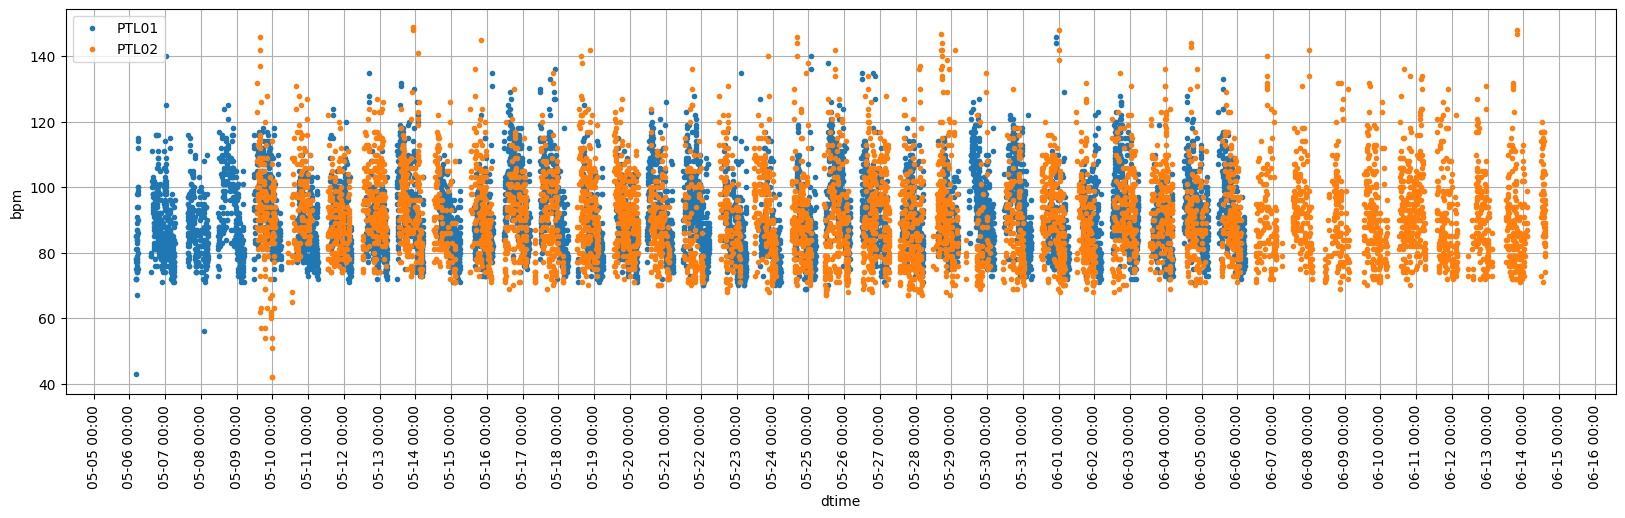

In [11]:
x_PTL02 = df_hr[2]["timestamp"]
y_PTL02 = df_hr[2]["bpm"]
x_PTL03 = df_hr[3]["timestamp"]
y_PTL03 = df_hr[3]["bpm"]
fig,ax = plt.subplots(1,1)
ax.figure.set_size_inches(20,5)
ax.plot_date(x_PTL02,y_PTL02,fmt='.')
ax.plot_date(x_PTL03,y_PTL03,fmt='.')
ax.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))
ax.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
plt.xticks(rotation = 90, ha = 'center')
ax.grid()
ax.set_xlabel('dtime')
ax.set_ylabel('bpm')
ax.legend(dirlist)

In [7]:
df_hr[2]['days_from_start'] = (df_hr[2]['timestamp'] - df_hr[2]['timestamp'].min()).dt.days
df_hr[3]['days_from_start'] = (df_hr[3]['timestamp'] - df_hr[3]['timestamp'].min()).dt.days
# print(df1['days_from_start'],df2['days_from_start'])
x_PTL02 = df_hr[2]["days_from_start"]
y_PTL02 = df_hr[2]["bpm"]
x_PTL03 = df_hr[3]["days_from_start"]
y_PTL03 = df_hr[3]["bpm"]


df1 = pd.DataFrame({'X': x_PTL02, 'Y': y_PTL02, 'Type': ['PTL02']*len(x_PTL02)})
df2 = pd.DataFrame({'X': x_PTL03, 'Y': y_PTL03, 'Type': ['PTL03']*len(x_PTL03)})
df = pd.concat([df1, df2])


/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_44210/3635435126.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax.get_yticks(), fontsize=10)


Text(0, 0.5, 'bpm')

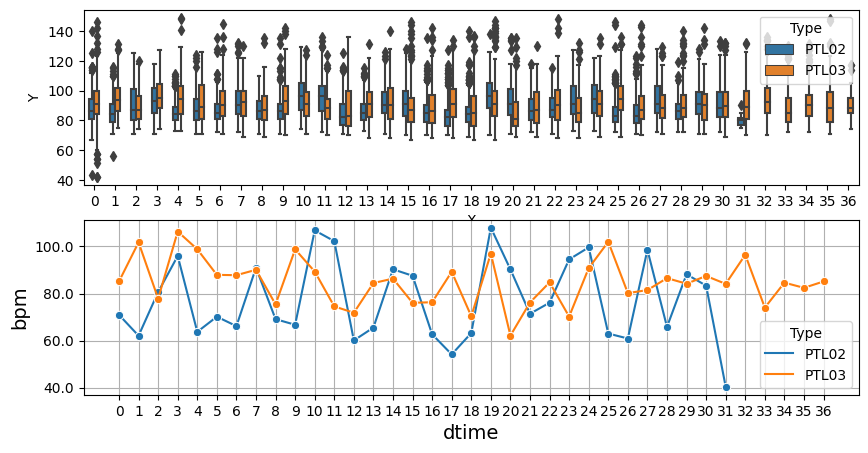

In [19]:
# Create plot
fig, [ax,ax2] = plt.subplots(2,figsize=(10, 5))
sns.boxplot(x='X', y='Y', hue='Type', data=df, width = 0.5,ax=ax)
mean_values = df.groupby(['X', 'Type']).mean().reset_index()
sns.lineplot(x='X', y='Y', hue='Type', data=mean_values, ax=ax2, marker="o")

# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
# ax.xaxis.set_major_locator(AutoDateLocator(maxticks=100))
# plt.xticks(rotation = 90, ha = 'center')
ax2.set_xticks(np.arange(0, max(x_PTL03)+1, 1))

ax2.set_xticklabels(ax.get_xticks(), fontsize=10)
ax2.set_yticklabels(ax.get_yticks(), fontsize=10)
ax2.grid()

ax2.set_xlabel('dtime',fontsize=14)
ax2.set_ylabel('bpm',fontsize=14)

# ax.legend(handles=legend_labels)

In [8]:
df_hrhrv[5] = df_hrhrv[5].loc[df_hrhrv[5]['5min_hr'] != 0]
df_hrhrv[5] = df_hrhrv[5].loc[df_hrhrv[5]['5min_hr'] != 0]


/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_75572/1745306998.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_75572/1745306998.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=allfontsize)


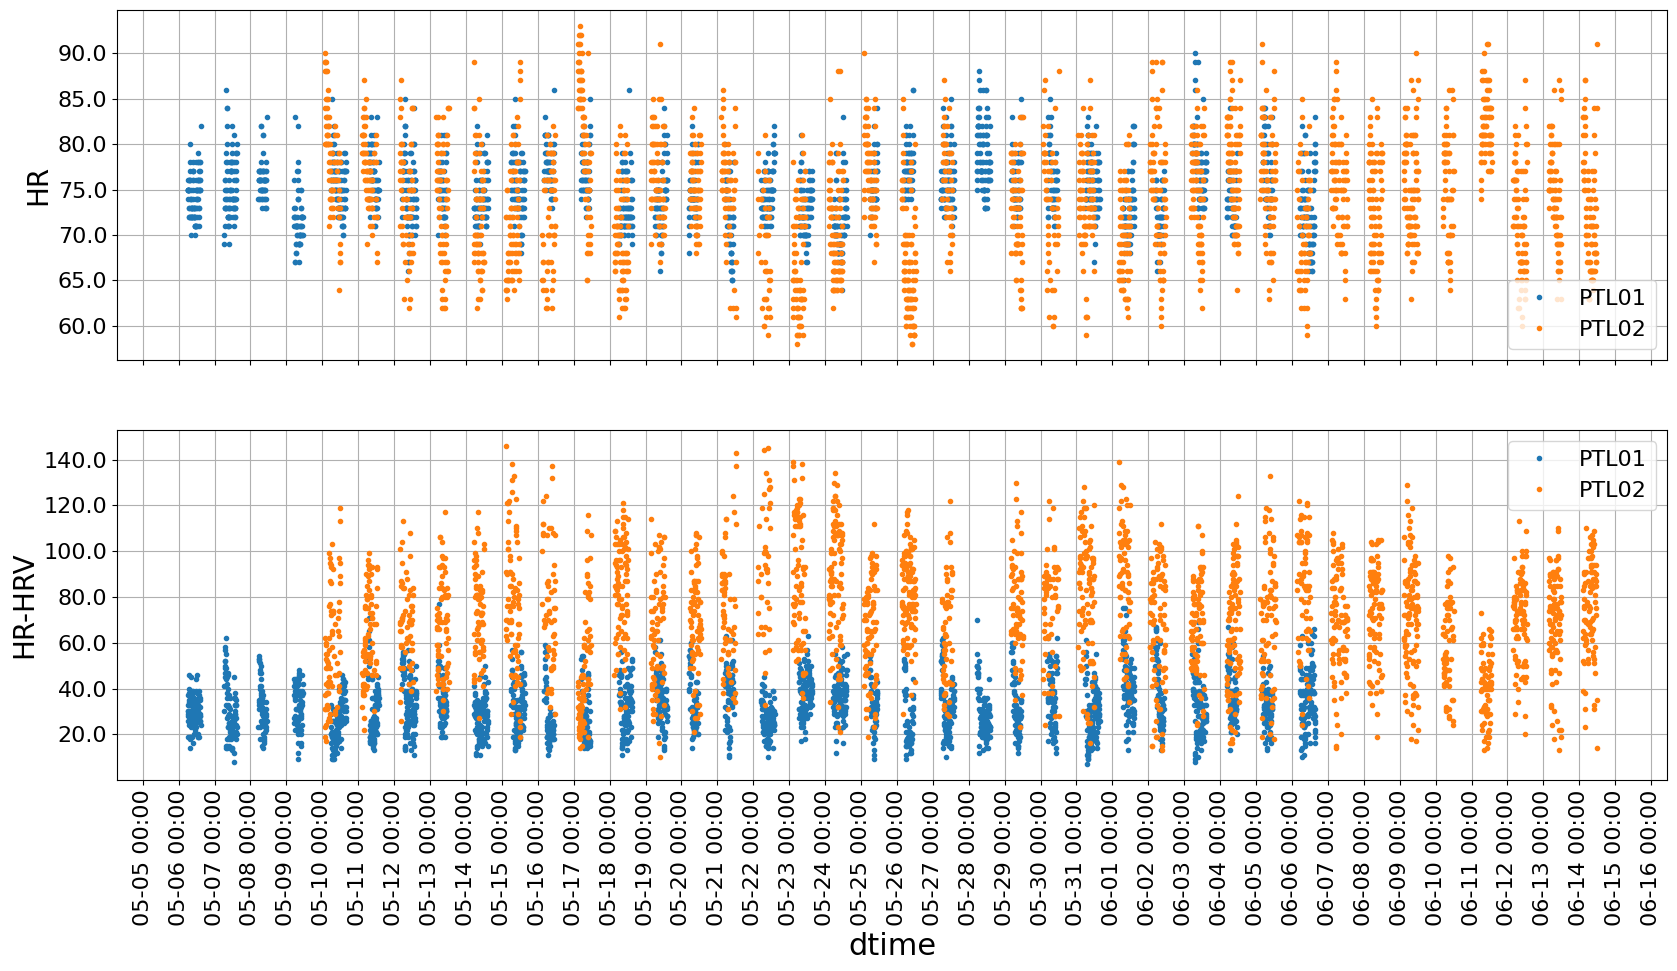

In [9]:
allfontsize = 16

df_hrhrv[2] = df_hrhrv[2].loc[df_hrhrv[2]['5min_hr'] != 0]
df_hrhrv[3] = df_hrhrv[3].loc[df_hrhrv[3]['5min_hr'] != 0]
x_PTL02 = df_hrhrv[2]["timestamp"]
y1_PTL02 = df_hrhrv[2]["5min_hr"]
y2_PTL02 = df_hrhrv[2]["5min_hrv"]
x_PTL03 = df_hrhrv[3]["timestamp"]
y1_PTL03 = df_hrhrv[3]["5min_hr"]
y2_PTL03 = df_hrhrv[3]["5min_hrv"]

fig,[ax1,ax2] = plt.subplots(2,1)
ax1.figure.set_size_inches(20,10)
ax1.plot_date(x_PTL02,y1_PTL02,fmt='.')
ax1.plot_date(x_PTL03,y1_PTL03,fmt='.')
ax1.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))
ax1.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
ax1.set_xticklabels([])
ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)
ax1.grid()
# a1x.set_xlabel('dtime')
# ax1.set_ylim(0, 100)
ax1.set_ylabel('HR',fontsize=20)
ax1.legend(dirlist,loc='lower right',fontsize=allfontsize)

ax2.figure.set_size_inches(20,10)
ax2.plot_date(x_PTL02,y2_PTL02,fmt='.')
ax2.plot_date(x_PTL03,y2_PTL03,fmt='.')
ax2.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))
ax2.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
plt.xticks(rotation = 90, ha = 'center',fontsize=allfontsize)
# ax2.set_xticklabels(ax2.get_xticks(), fontsize=16)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=allfontsize)
ax2.grid()
# ax2.set_ylim(0, 150)
ax2.set_xlabel('dtime',fontsize=22)
ax2.set_ylabel('HR-HRV',fontsize=20)
ax2.legend(dirlist,fontsize=allfontsize)

In [20]:

df_hrhrv[2]['days_from_start'] = (df_hrhrv[2]['timestamp'] - df_hrhrv[2]['timestamp'].min()).dt.days
df_hrhrv[3]['days_from_start'] = (df_hrhrv[3]['timestamp'] - df_hrhrv[3]['timestamp'].min()).dt.days
# print(df1['days_from_start'],df2['days_from_start'])
x_PTL02 = df_hrhrv[2]["days_from_start"]
y1_PTL02 = df_hrhrv[2]["5min_hr"]
y2_PTL02 = df_hrhrv[2]["5min_hrv"]
x_PTL03 = df_hrhrv[3]["days_from_start"]
y1_PTL03 = df_hrhrv[3]["5min_hr"]
y2_PTL03 = df_hrhrv[3]["5min_hrv"]


df1 = pd.DataFrame({'X': x_PTL02, 'Y': y1_PTL02, 'Type': ['PTL02']*len(x_PTL02)})
df2 = pd.DataFrame({'X': x_PTL03, 'Y': y1_PTL03, 'Type': ['PTL03']*len(x_PTL03)})
df_hr = pd.concat([df1, df2])
df1 = pd.DataFrame({'X': x_PTL02, 'Y': y2_PTL02, 'Type': ['PTL02']*len(x_PTL02)})
df2 = pd.DataFrame({'X': x_PTL03, 'Y': y2_PTL03, 'Type': ['PTL03']*len(x_PTL03)})
df_hrv = pd.concat([df1, df2])

In [27]:
df1 = pd.DataFrame({'X': x_PTL02, 'Y': y1_PTL02})
target = df1.groupby(["X"]).mean()
target = (target - target.mean()) / target.std()
target.to_csv('/Users/yiwengeng/Documents/PregnantPrj/Data/hrv.csv')

In [32]:
df_hrhrv[2]['timestamp']

1      2023-05-06 00:59:23-05:00
2      2023-05-06 01:04:23-05:00
3      2023-05-06 01:09:23-05:00
4      2023-05-06 01:14:23-05:00
5      2023-05-06 01:19:23-05:00
                  ...           
3035   2023-06-06 10:20:18-05:00
3036   2023-06-06 10:25:18-05:00
3037   2023-06-06 10:30:18-05:00
3038   2023-06-06 10:35:18-05:00
3039   2023-06-06 10:40:18-05:00
Name: timestamp, Length: 2925, dtype: datetime64[ns, UTC-05:00]

In [ ]:
df_hrhrv[2].groupby("5min_hrv", "days_from_start").mean()

/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_75572/177381642.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=16)
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_75572/177381642.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax2.get_yticks(), fontsize=16)
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_75572/177381642.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=16)


Text(0, 0.5, 'HRV')

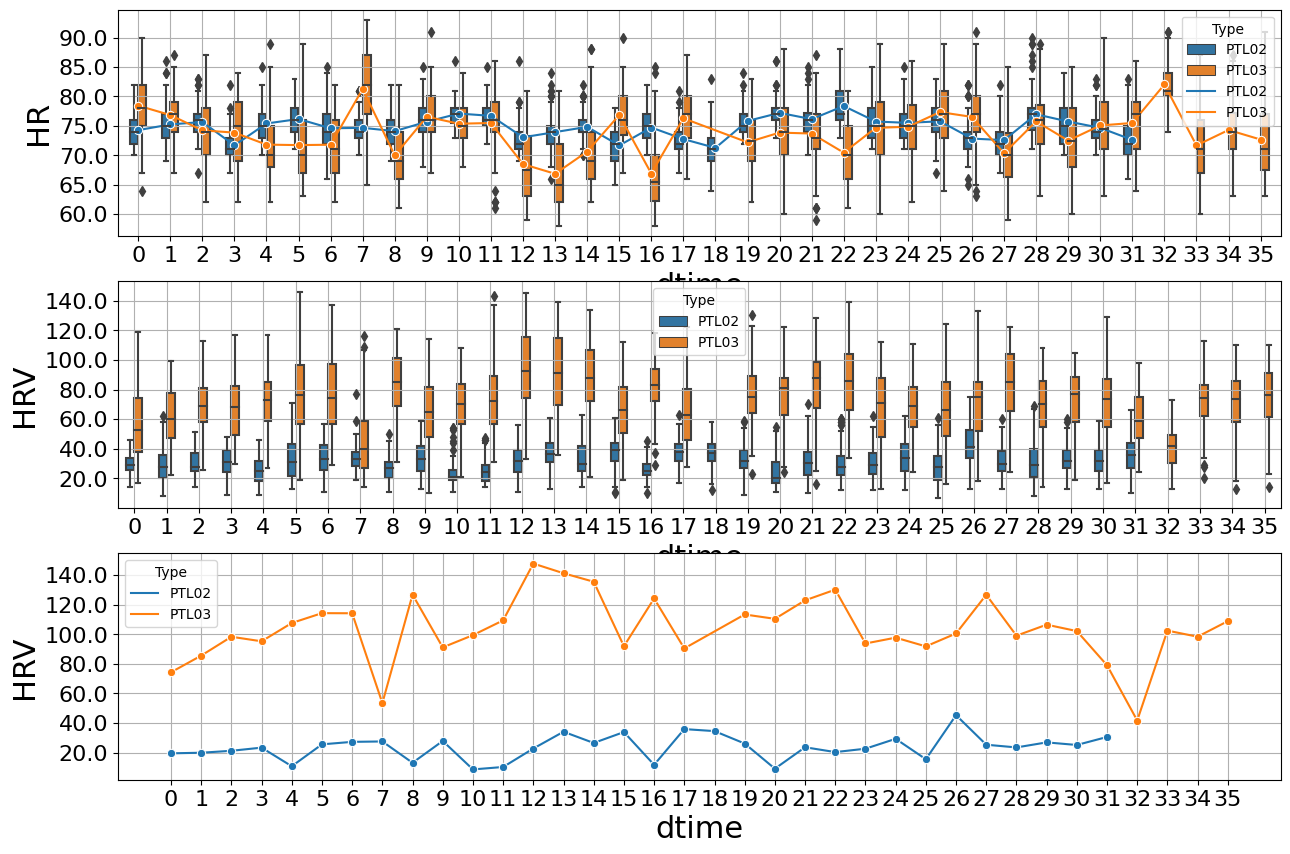

In [11]:
fig, [ax1,ax2,ax3] = plt.subplots(3,figsize=(15, 10))
sns.boxplot(x='X', y='Y', hue='Type', data=df_hr, ax=ax1, width = 0.5)
mean_values = df_hr.groupby(['X', 'Type']).mean().reset_index()
sns.lineplot(x='X', y='Y', hue='Type', data=mean_values, ax=ax1, marker="o")

# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
# ax.xaxis.set_major_locator(AutoDateLocator(maxticks=100))
# plt.xticks(rotation = 90, ha = 'center')
ax1.set_xticks(np.arange(0, max(x_PTL03)+1, 1))

ax1.set_xticklabels(ax1.get_xticks(), fontsize=16)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=16)
ax1.grid()
ax1.set_xlabel('dtime',fontsize=22)
ax1.set_ylabel('HR',fontsize=22)


sns.boxplot(x='X', y='Y', hue='Type', data=df_hrv, ax=ax2, width = 0.5)
mean_values = df_hrv.groupby(['X', 'Type']).mean().reset_index()
sns.lineplot(x='X', y='Y', hue='Type', data=mean_values, ax=ax3, marker="o")

ax3.set_xticks(np.arange(0, max(x_PTL03)+1, 1))

ax3.set_xticklabels(ax2.get_xticks(), fontsize=16)
ax3.set_yticklabels(ax2.get_yticks(), fontsize=16)
ax3.grid()
ax3.set_xlabel('dtime',fontsize=22)
ax3.set_ylabel('HRV',fontsize=22)
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
# ax.xaxis.set_major_locator(AutoDateLocator(maxticks=100))
# plt.xticks(rotation = 90, ha = 'center')
ax2.set_xticks(np.arange(0, max(x_PTL03)+1, 1))

ax2.set_xticklabels(ax2.get_xticks(), fontsize=16)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=16)
ax2.grid()
ax2.set_xlabel('dtime',fontsize=22)
ax2.set_ylabel('HRV',fontsize=22)
# ax.legend(handles=legend_labels)

In [18]:
len(df_hrv.loc("Type"=="PTL02"))

TypeError: object of type '_LocIndexer' has no len()

In [ ]:
act_names=["activity_score", "score_meet_daily_targets","score_move_every_hour","score_stay_active","steps"]


/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/121060817.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/121060817.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/121060817.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/121060817.py:27: UserWarning: linestyle is redundantly defined by 

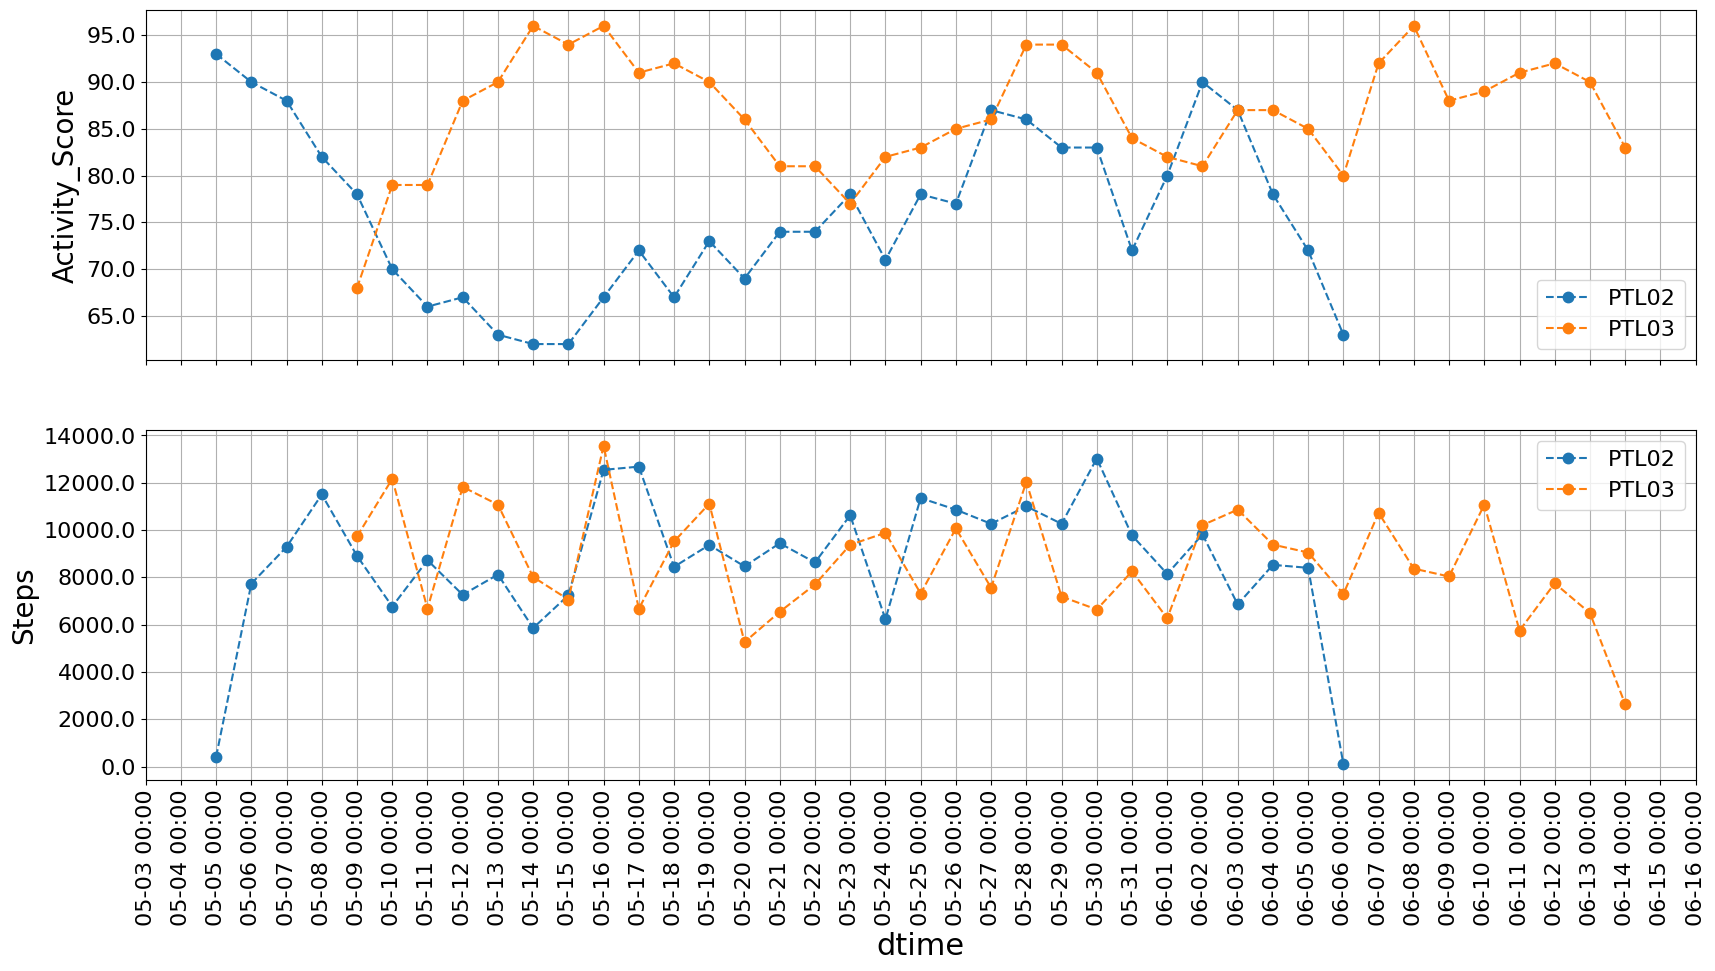

In [141]:
allfontsize = 16

# df_act[2] = df_hrhrv[2].loc[df_hrhrv[2]['5min_hr'] != 0]
# df_hrhrv[3] = df_hrhrv[3].loc[df_hrhrv[3]['5min_hr'] != 0]
x_PTL02 = df_act[2]["summary_date"]
y1_PTL02 = df_act[2]["activity_score"]
y2_PTL02 = df_act[2]["steps"]
x_PTL03 = df_act[3]["summary_date"]
y1_PTL03 = df_act[3]["activity_score"]
y2_PTL03 = df_act[3]["steps"]

fig,[ax1,ax2] = plt.subplots(2,1)
ax1.figure.set_size_inches(20,10)
ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--') 
ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
# ax1.xaxis.set_major_formatter(DateFormatter('%m-%d))
ax1.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
ax1.set_xticklabels([])
ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)
ax1.grid()
# a1x.set_xlabel('dtime')
# ax1.set_ylim(0, 100)
ax1.set_ylabel('Activity_Score',fontsize=20)
ax1.legend(dirlist,loc='lower right',fontsize=allfontsize)

ax2.figure.set_size_inches(20,10)
ax2.plot_date(x_PTL02,y2_PTL02,fmt='.-', markersize=15, linestyle='--')
ax2.plot_date(x_PTL03,y2_PTL03,fmt='.-', markersize=15, linestyle='--')
ax2.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))
ax2.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
plt.xticks(rotation = 90, ha = 'center',fontsize=allfontsize)
# ax2.set_xticklabels(ax2.get_xticks(), fontsize=16)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=allfontsize)
ax2.grid()
# ax2.set_ylim(0, 150)
ax2.set_xlabel('dtime',fontsize=22)
ax2.set_ylabel('Steps',fontsize=20)
ax2.legend(dirlist,fontsize=allfontsize)

/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/106349028.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/106349028.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/106349028.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)


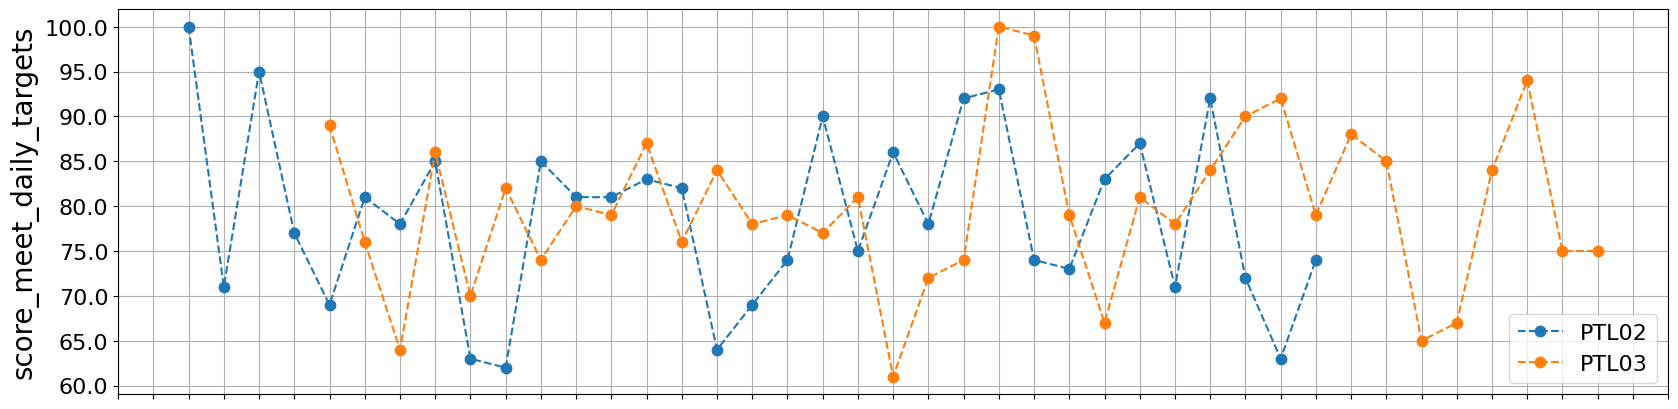

In [148]:
allfontsize = 16
act_names=["activity_score", "score_meet_daily_targets","score_move_every_hour","score_stay_active","steps"]

# df_act[2] = df_hrhrv[2].loc[df_hrhrv[2]['5min_hr'] != 0]
# df_hrhrv[3] = df_hrhrv[3].loc[df_hrhrv[3]['5min_hr'] != 0]
x_PTL02 = df_act[2]["summary_date"]
y1_PTL02 = df_act[2]["score_stay_active"]
x_PTL03 = df_act[3]["summary_date"]
y1_PTL03 = df_act[3]["score_stay_active"]


# df1 = pd.DataFrame({'X': x_PTL02, 'Y': y1_PTL02, 'Type': ['PTL02']*len(x_PTL02)})
# df2 = pd.DataFrame({'X': x_PTL03, 'Y': y1_PTL03, 'Type': ['PTL03']*len(x_PTL03)})
# df_score = pd.concat([df1, df2])


fig,ax1 = plt.subplots(figsize=(20, 5))

ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--') 
ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
# ax1.xaxis.set_major_formatter(DateFormatter('%m-%d))
ax1.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
ax1.set_xticklabels([])
ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)
ax1.grid()
# a1x.set_xlabel('dtime')
# ax1.set_ylim(0, 100)
ax1.set_ylabel('score_meet_daily_targets',fontsize=20)
ax1.legend(dirlist,loc='lower right',fontsize=allfontsize)

# sns.boxplot(x='X', y='Y', hue='Type', data=df_score, ax=ax2, width = 0.5)
# mean_values = df_score.groupby(['X', 'Type']).mean().reset_index()
# sns.lineplot(x='X', y='Y', hue='Type', data=mean_values, ax=ax2, marker="o")

# # ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
# # ax.xaxis.set_major_locator(AutoDateLocator(maxticks=100))
# # plt.xticks(rotation = 90, ha = 'center')
# ax2.set_xticks(np.arange(0, max(x_PTL03)+1, 1))

# ax2.set_xticklabels(ax1.get_xticks(), fontsize=16)
# ax2.set_yticklabels(ax1.get_yticks(), fontsize=16)
# ax2.grid()
# ax2.set_xlabel('dtime',fontsize=22)
# ax2.set_ylabel('score_meet_daily_targets',fontsize=22)



/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/513717962.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/513717962.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/513717962.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)


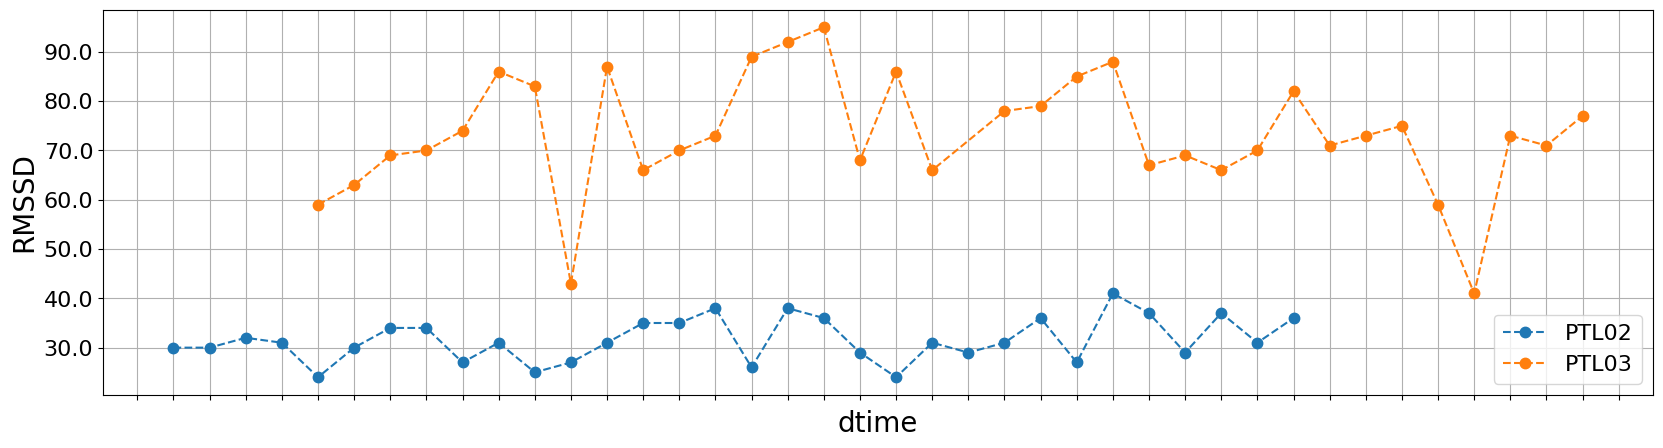

In [163]:
sleep_names=["sleep_score", "duration","efficiency","onset_latency","rmssd",
             "score_deep","score_efficiency","score_rem"]

allfontsize = 16

# df_act[2] = df_hrhrv[2].loc[df_hrhrv[2]['5min_hr'] != 0]
# df_hrhrv[3] = df_hrhrv[3].loc[df_hrhrv[3]['5min_hr'] != 0]
x_PTL02 = df_sleep[2]["summary_date"]
y1_PTL02 = df_sleep[2]["rmssd"]
x_PTL03 = df_sleep[3]["summary_date"]
y1_PTL03 = df_sleep[3]["rmssd"]


# df1 = pd.DataFrame({'X': x_PTL02, 'Y': y1_PTL02, 'Type': ['PTL02']*len(x_PTL02)})
# df2 = pd.DataFrame({'X': x_PTL03, 'Y': y1_PTL03, 'Type': ['PTL03']*len(x_PTL03)})
# df_score = pd.concat([df1, df2])


fig,ax1 = plt.subplots(figsize=(20, 5))

ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--') 
ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
# ax1.xaxis.set_major_formatter(DateFormatter('%m-%d))
ax1.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
ax1.set_xticklabels([])
ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)
ax1.grid()
ax1.set_xlabel('dtime',fontsize=20)
# ax1.set_ylim(0, 100)
ax1.set_ylabel('RMSSD',fontsize=20)
ax1.legend(dirlist,loc='lower right',fontsize=allfontsize)



/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/767790612.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/767790612.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
/var/folders/5k/7qwwwxx54j1gmzt25kp5c4g00000gn/T/ipykernel_11638/767790612.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)


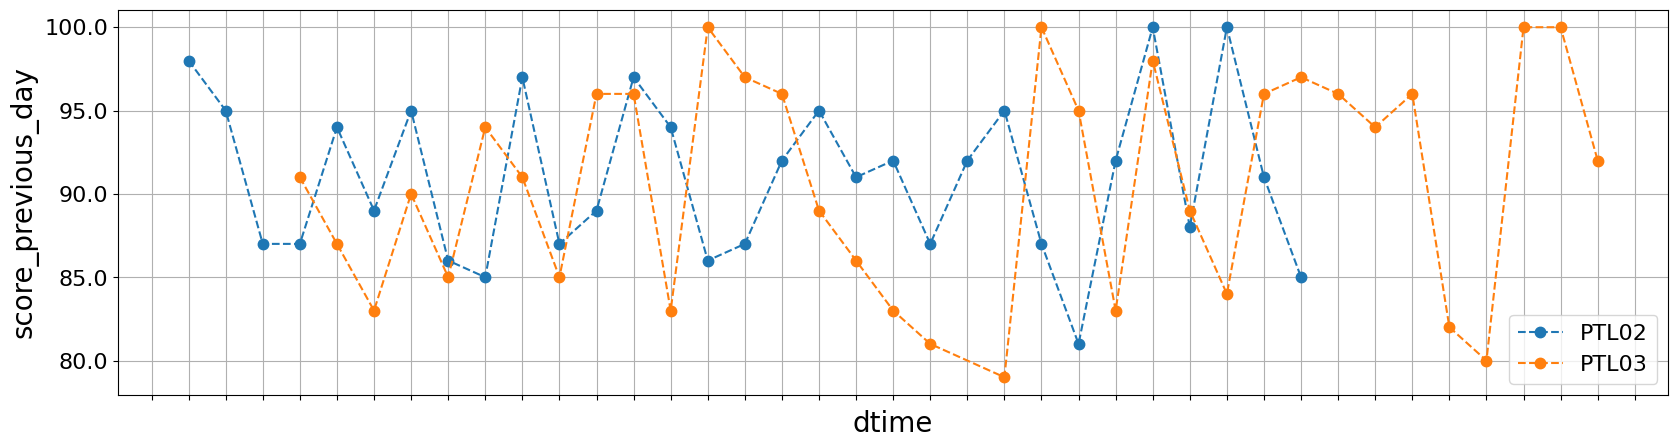

In [170]:
ready_names=["readiness_score", "score_previous_night","score_sleep_balance", 
             "score_previous_day","score_activity_balance","score_resting_hr",
             "score_hrv_balance","score_recovery_index","score_temperature"]

sleep_names=["sleep_score", "duration","efficiency","onset_latency","rmssd",
             "score_deep","score_efficiency","score_rem"]

allfontsize = 16

# df_act[2] = df_hrhrv[2].loc[df_hrhrv[2]['5min_hr'] != 0]
# df_hrhrv[3] = df_hrhrv[3].loc[df_hrhrv[3]['5min_hr'] != 0]

x_PTL02 = df_ready[2]["summary_date"]
y1_PTL02 = df_ready[2]["score_previous_day"]
x_PTL03 = df_ready[3]["summary_date"]
y1_PTL03 = df_ready[3]["score_previous_day"]


# df1 = pd.DataFrame({'X': x_PTL02, 'Y': y1_PTL02, 'Type': ['PTL02']*len(x_PTL02)})
# df2 = pd.DataFrame({'X': x_PTL03, 'Y': y1_PTL03, 'Type': ['PTL03']*len(x_PTL03)})
# df_score = pd.concat([df1, df2])


fig,ax1 = plt.subplots(figsize=(20, 5))

ax1.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--') 
ax1.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
# ax1.xaxis.set_major_formatter(DateFormatter('%m-%d))
ax1.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
ax1.set_xticklabels([])
ax1.set_yticklabels(ax1.get_yticks(), fontsize=allfontsize)
ax1.grid()
ax1.set_xlabel('dtime',fontsize=20)
# ax1.set_ylim(0, 100)
ax1.set_ylabel('score_previous_day',fontsize=20)
ax1.legend(dirlist,loc='lower right',fontsize=allfontsize)



#### combine w/trama data and w/o trama data

In [17]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6228 entries, 0 to 53
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   summary_date_x                 6228 non-null   datetime64[ns]
 1   sleep_score                    6228 non-null   int64         
 2   score_alignment                6228 non-null   int64         
 3   score_deep                     6228 non-null   int64         
 4   score_disturbances             6228 non-null   int64         
 5   score_efficiency               6228 non-null   int64         
 6   score_latency                  6228 non-null   int64         
 7   score_rem                      6228 non-null   int64         
 8   score_total                    6228 non-null   int64         
 9   duration                       6228 non-null   int64         
 10  awake                          6228 non-null   int64         
 11  light                   

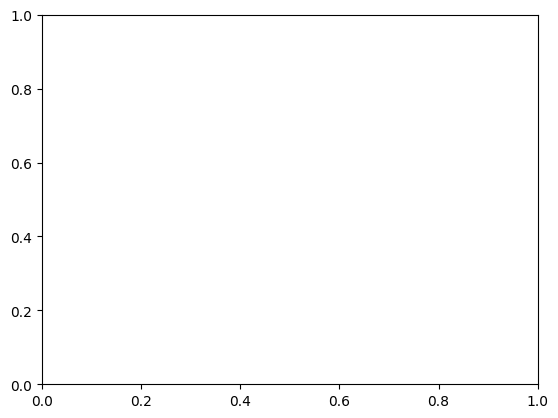

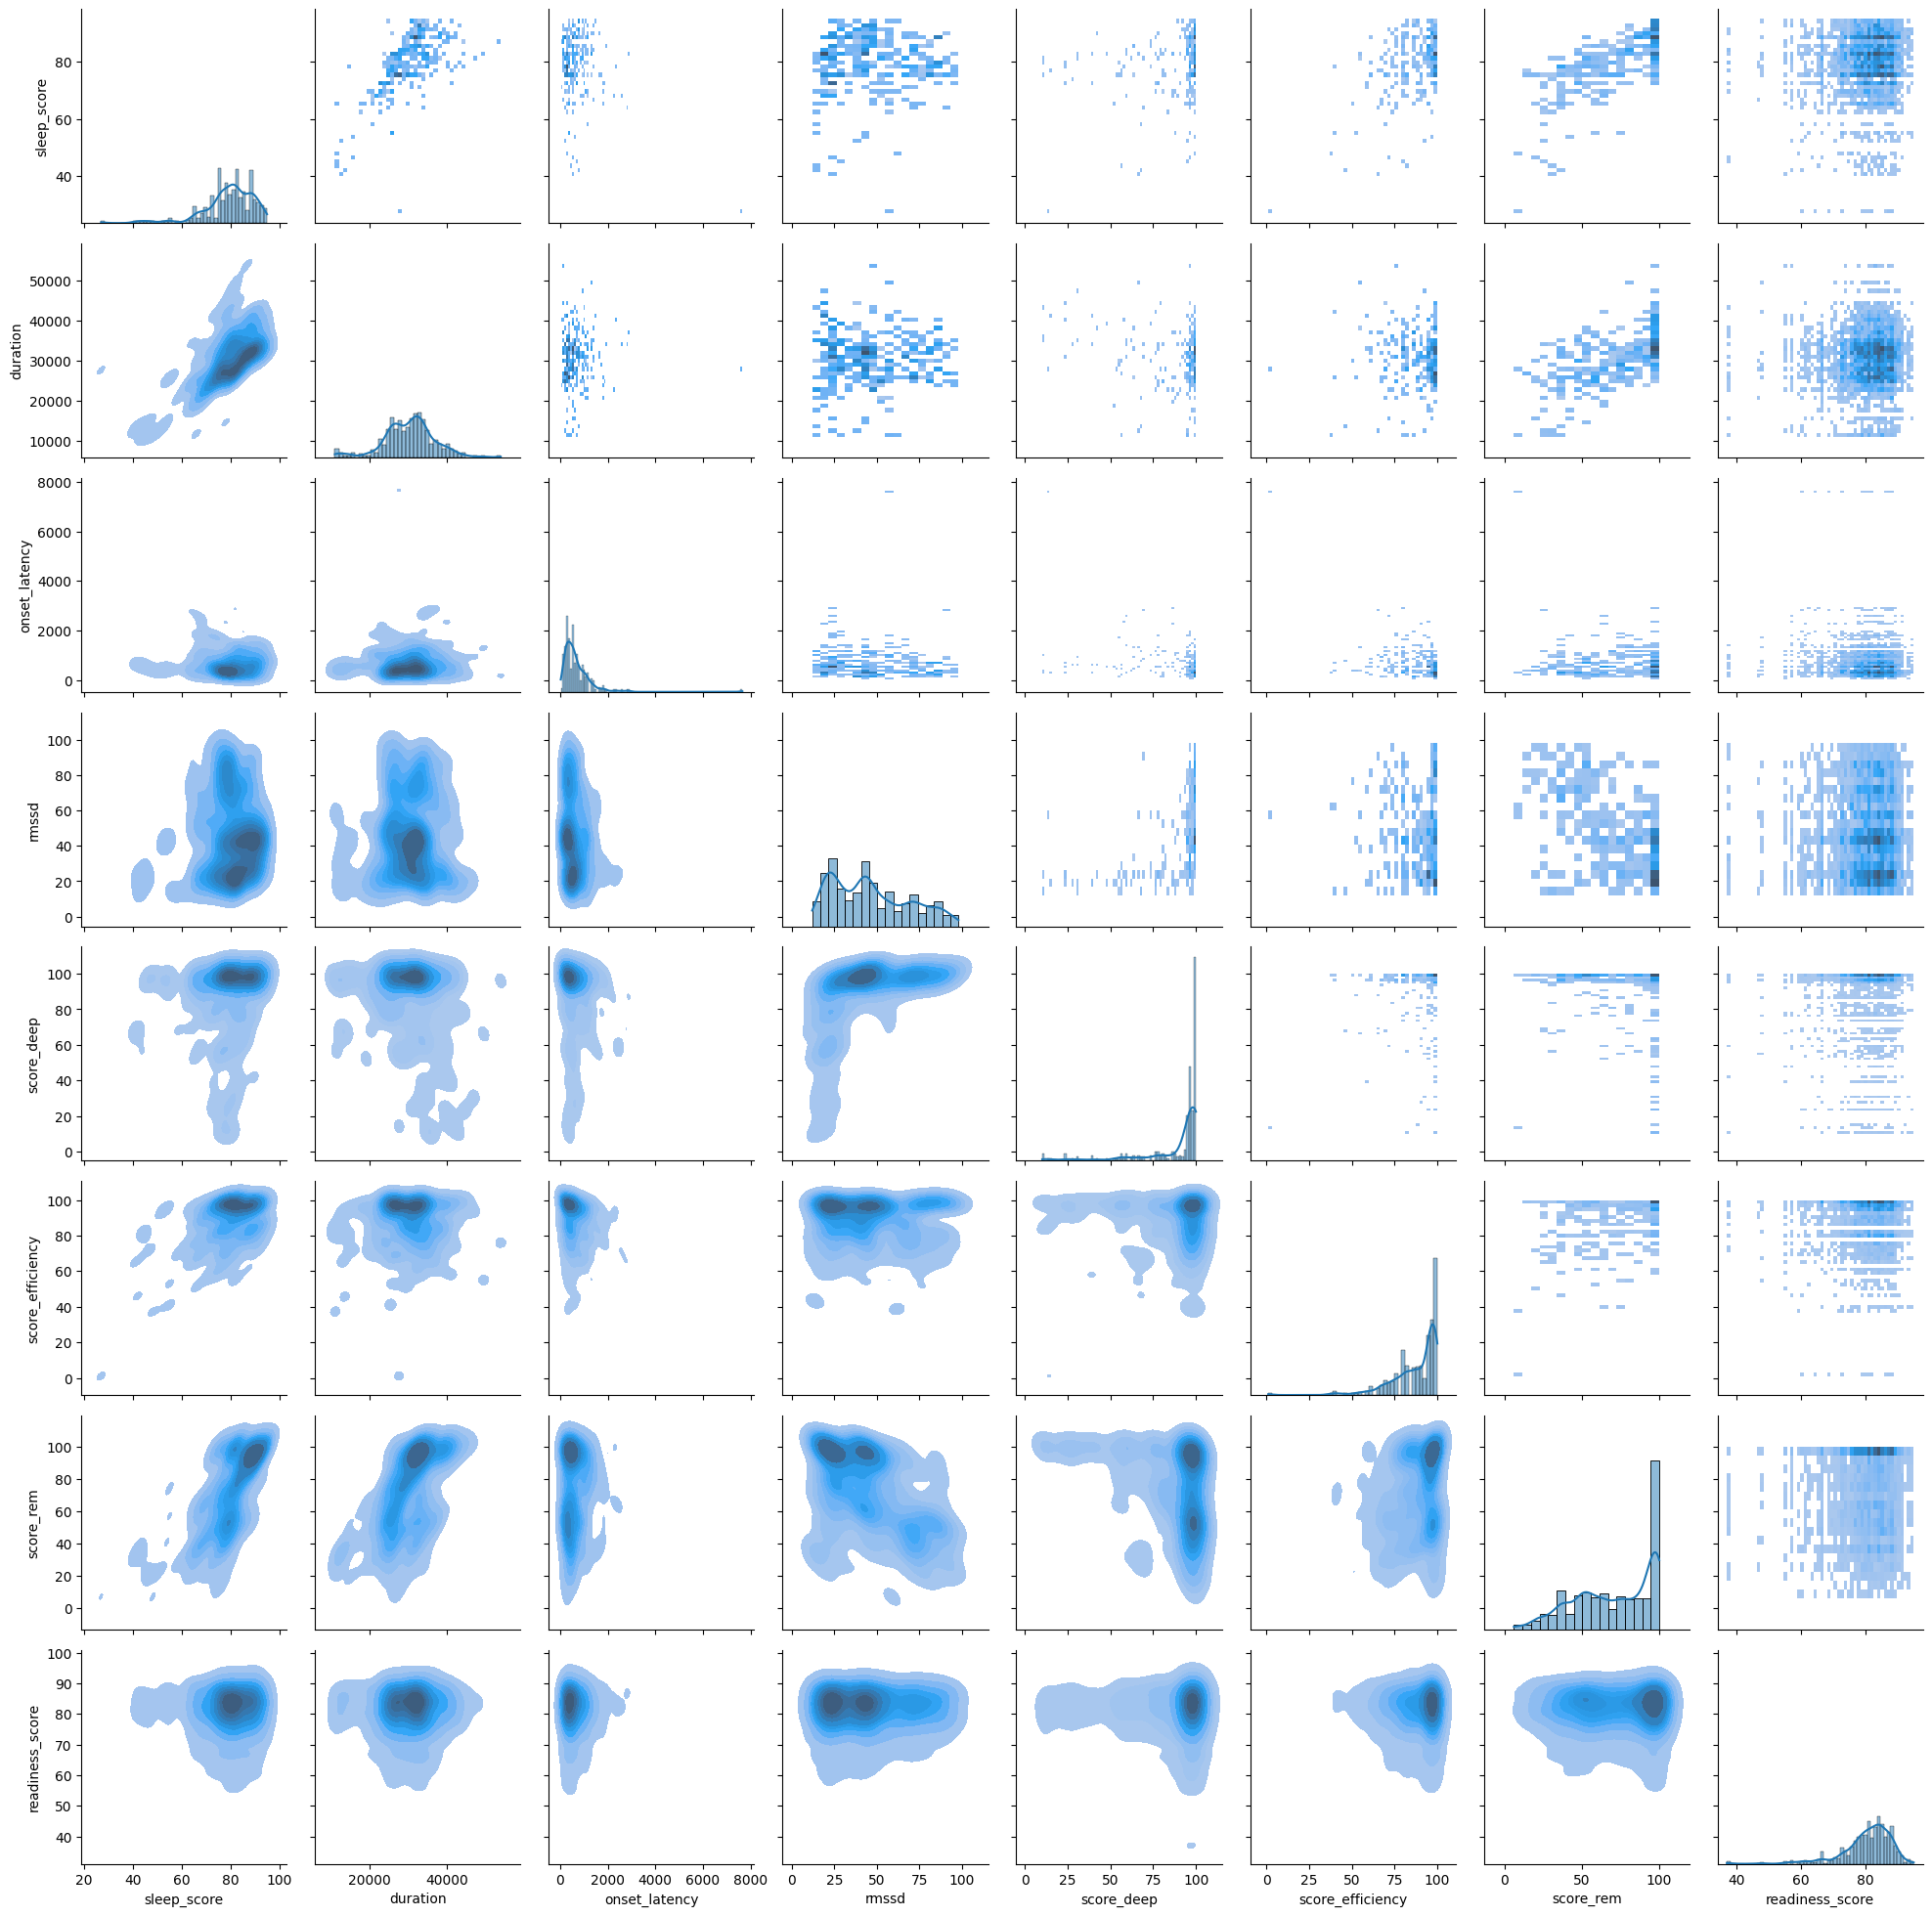

In [12]:
fig,ax1 = plt.subplots(figsize=(20, 5))
sns.histplot(data=)
# sns.displot(df_hrhrv_all, x="5min_hrv", hue="Trama", kind="hist", fill=True, ax=ax1)
# sns.displot(df_hrhrv_all, x="5min_hrv", hue="Trama", kind="kde", fill=True, ax=ax1)
# sns.displot(df_hrhrv_all, x="5min_hrv", hue="Trama", kind="ecdf",  ax=ax1)
# plt.hist(df_hrhrv_all["5min_hrv"], bins=30, alpha=0.75, color='blue', edgecolor='black')
# sns.jointplot(
#     data=new_data,
#     x="score_efficiency", y="readiness_score", hue="Trama_x",
#     kind="kde"
# )

ready_names=["readiness_score", "score_previous_night","score_sleep_balance", 
             "score_previous_day","score_activity_balance","score_resting_hr",
             "score_hrv_balance","score_recovery_index","score_temperature"]
sleep_names=["sleep_score", "duration","efficiency","onset_latency","rmssd",
             "score_deep","score_efficiency","score_rem"]
g = sns.PairGrid(new_data[new_data['Trama_x']>0], vars=["sleep_score", "duration","onset_latency","rmssd",
             "score_deep","score_efficiency","score_rem","readiness_score"]  )
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# ax.plot_date(x_PTL02,y1_PTL02,fmt='.-', markersize=15, linestyle='--') 
# ax.plot_date(x_PTL03,y1_PTL03,fmt='.-', markersize=15, linestyle='--')
# # ax.xaxis.set_major_formatter(DateFormatter('%m-%d))
# ax.xaxis.set_major_locator(AutoDateLocator(maxticks=50))
# ax.set_xticklabels([])
# ax.set_yticklabels(ax.get_yticks(), fontsize=allfontsize)
# ax.grid()
# ax.set_xlabel('dtime',fontsize=20)
# # ax.set_ylim(0, 100)
# ax.set_ylabel('RMSSD',fontsize=20)
# ax.legend(dirlist,loc='lower right',fontsize=allfontsize)